In [1]:
#histogram Binning and Density
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)


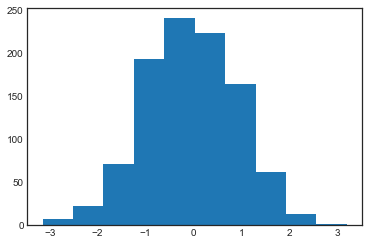

In [2]:
plt.hist(data);

C:\Users\margaretm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


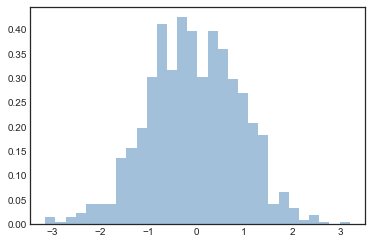

In [3]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');


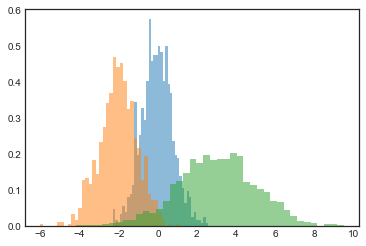

In [4]:
#stepfilled Histtype....display histograms of different distributions
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.5, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

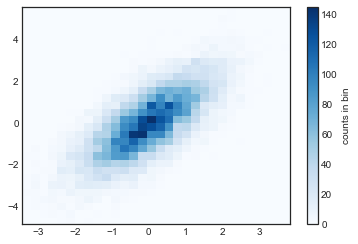

In [5]:
#Two-Dimensional Histograms and Binnings
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [6]:
#Customizing Plot Legends


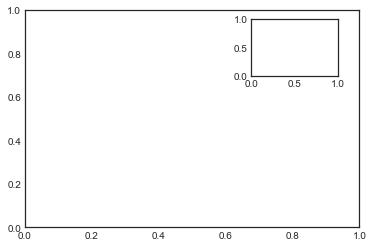

In [7]:
#Multiple Subplots
ax1 = plt.axes()
ax1 = plt.axes([0.65, 0.65, 0.2, 0.2])


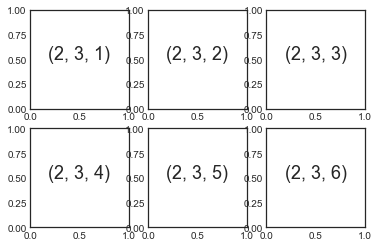

In [8]:
for i in range(1,7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')

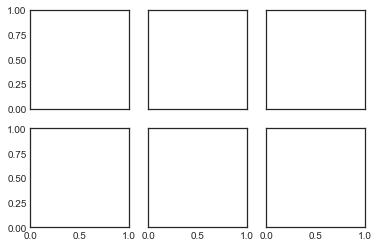

In [9]:
#plt.subplots the whole grid in one go
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

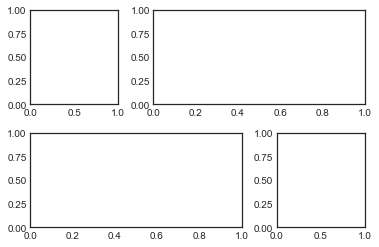

In [10]:
#plt.GridSpec: More Complicated Arrangements
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);


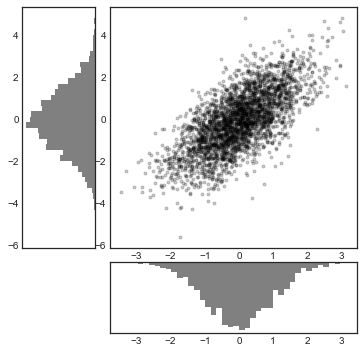

<Figure size 432x432 with 0 Axes>

In [11]:
mean= [0,0]
cov = [[1,1], [1,2]]
x,y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()


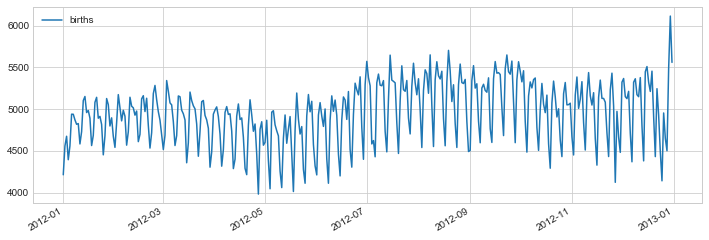

In [12]:
#Text and Annotation
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from urllib.request import urlretrieve
df = pd.read_csv("F:\\DataSets\\Trial\\births.csv")
#dfcolumns = ['Year', 'Month', 'Day', 'Gender', 'Births']
quartiles = np.percentile(df['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
df = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
df['day'] = df['day'].astype(int)
df.index = pd.to_datetime(10000 * df.year + 100 * df.month + df.day, format='%Y%m%d')
births_by_date = df.pivot_table('births', [df.index.month, df.index.day])
births_by_date.index = [pd.datetime(2012, month, day) 
                        for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

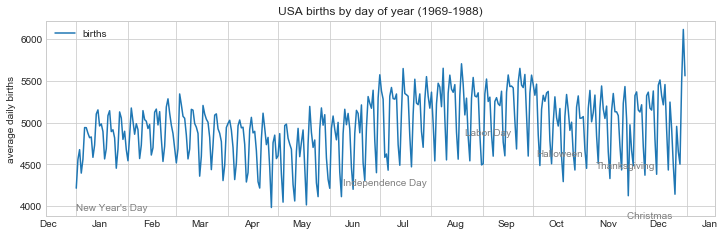

In [13]:
#plt.text/ax.text
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

import matplotlib as mpl
# Label the axes
ax.set(title='USA births by day of year (1969-1988)', 
       ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

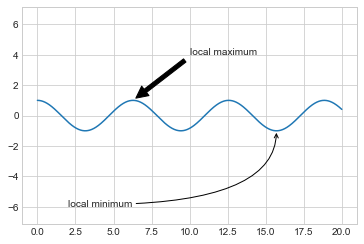

In [14]:
#Arrows and Annotation
%matplotlib inline
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));


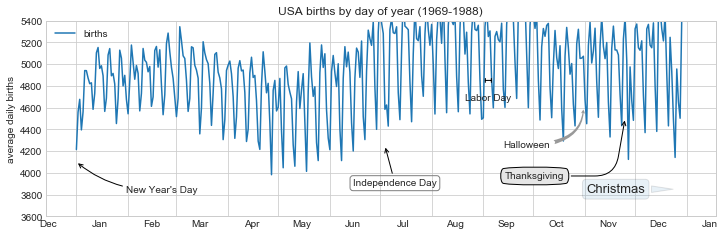

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));


ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);



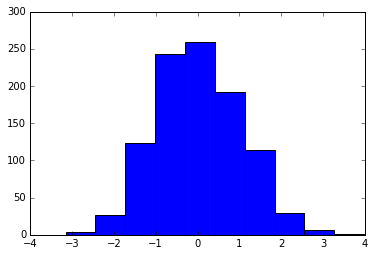

In [16]:
#customizing ticks
#Customizing Matplotlib: Configurations and Stylesheets
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline
x = np.random.randn(1000)
plt.hist(x);


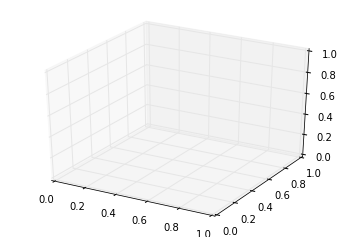

In [17]:
#three dimensional plotting in matplotlib
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
## keyword projection='3d'

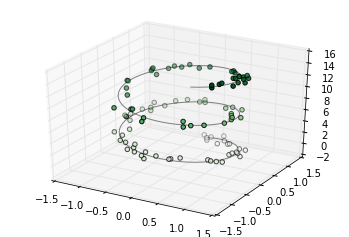

In [18]:
ax = plt.axes(projection='3d')
import numpy as np
#data for a 3d line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')


# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


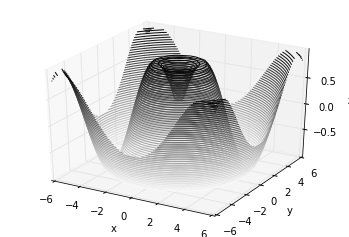

In [19]:
#Three-Dimensional Contour Plots
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



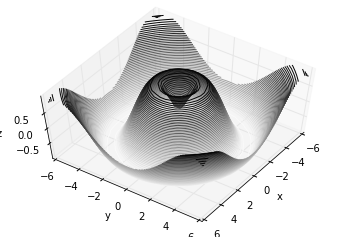

In [20]:
##optimal viewing
ax.view_init(60, 35)
fig

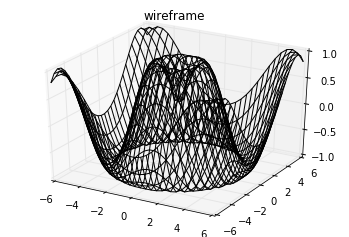

In [21]:
##wireframes and surface plots
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');


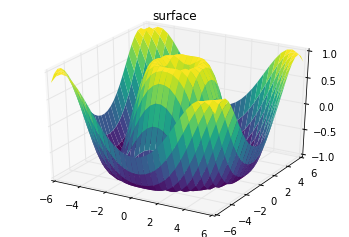

In [23]:
#A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')
ax.set_title('surface');